In [1]:
## simplest example of reparameterization trick using pytorch


import torch

# Mean and standard deviation (learnable parameters)
mu = torch.tensor(2.0, requires_grad=True)
sigma = torch.tensor(0.5, requires_grad=True)

# Sample from a standard normal distribution
epsilon = torch.randn(1)

# Reparameterized sample
z = mu + sigma * epsilon

print("Sampled z:", z.item())


Sampled z: 1.9295878410339355


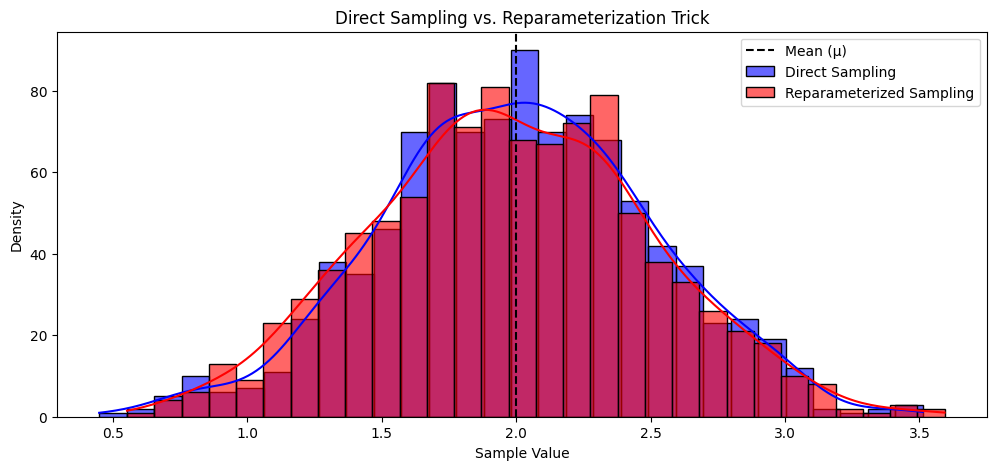

Gradient of mu: 1.0000
Gradient of sigma: 0.2388


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define mu and sigma as learnable parameters
mu = torch.tensor(2.0, requires_grad=True)  # Mean
sigma = torch.tensor(0.5, requires_grad=True)  # Standard deviation

# Number of samples
num_samples = 1000

# Direct sampling from N(mu, sigma^2) (Fixed version)
direct_samples = torch.normal(mean=mu.expand(num_samples), std=sigma.expand(num_samples))

# Reparameterized sampling: z = mu + sigma * epsilon
epsilon = torch.randn(num_samples)  # Standard normal noise
reparam_samples = mu + sigma * epsilon  # Reparameterized samples

# Convert to NumPy for plotting
direct_samples_np = direct_samples.detach().numpy()
reparam_samples_np = reparam_samples.detach().numpy()

# Plot histograms
plt.figure(figsize=(12, 5))
sns.histplot(direct_samples_np, bins=30, color="blue", alpha=0.6, label="Direct Sampling", kde=True)
sns.histplot(reparam_samples_np, bins=30, color="red", alpha=0.6, label="Reparameterized Sampling", kde=True)
plt.axvline(mu.item(), color='black', linestyle='--', label="Mean (μ)")
plt.title("Direct Sampling vs. Reparameterization Trick")
plt.legend()
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.show()

# Gradient Demonstration
z = mu + sigma * torch.randn(1)  # One reparameterized sample
z.backward()  # Compute gradients

# Print gradients
print(f"Gradient of mu: {mu.grad.item():.4f}")
print(f"Gradient of sigma: {sigma.grad.item():.4f}")


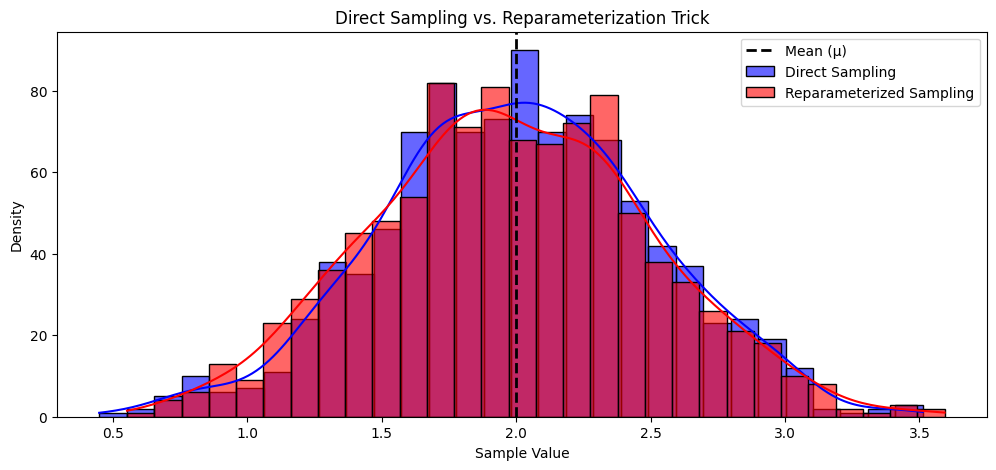

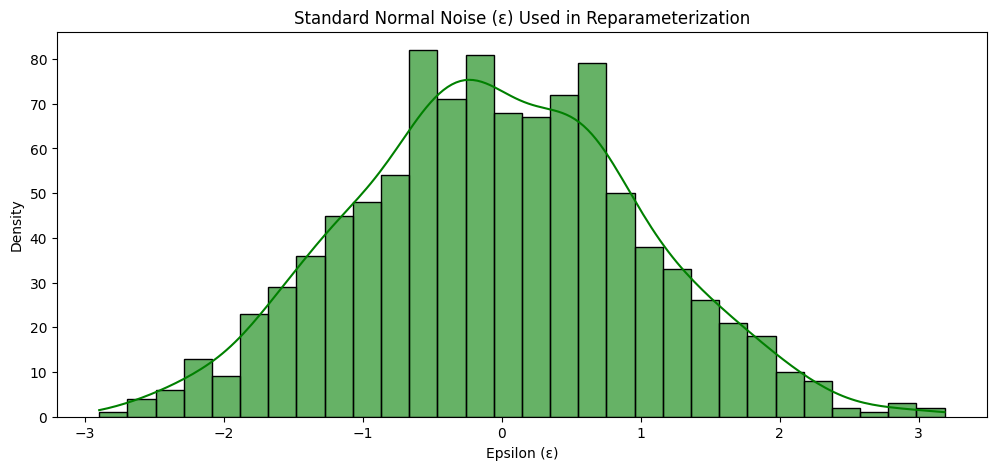

Gradient of mu: 1.0000
Gradient of sigma: 0.2388


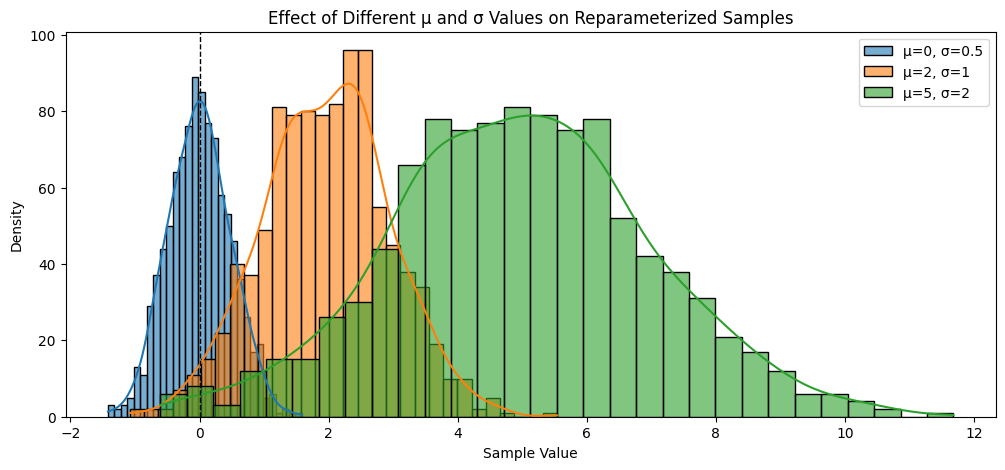

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define mu and sigma as learnable parameters
mu = torch.tensor(2.0, requires_grad=True)  # Mean
sigma = torch.tensor(0.5, requires_grad=True)  # Standard deviation

# Number of samples
num_samples = 1000


# Direct sampling from N(mu, sigma^2) (Fixed version)
direct_samples = torch.normal(mean=mu.expand(num_samples), std=sigma.expand(num_samples))

# Reparameterized sampling: z = mu + sigma * epsilon
epsilon = torch.randn(num_samples)  # Standard normal noise
reparam_samples = mu + sigma * epsilon  # Reparameterized samples

# Convert to NumPy for plotting
direct_samples_np = direct_samples.detach().numpy()
reparam_samples_np = reparam_samples.detach().numpy()

# Plot histograms
plt.figure(figsize=(12, 5))
sns.histplot(direct_samples_np, bins=30, color="blue", alpha=0.6, label="Direct Sampling", kde=True)
sns.histplot(reparam_samples_np, bins=30, color="red", alpha=0.6, label="Reparameterized Sampling", kde=True)
plt.axvline(mu.item(), color='black', linestyle='--', label="Mean (μ)", linewidth=2)
plt.title("Direct Sampling vs. Reparameterization Trick")
plt.legend()
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.show()

# Noise effect visualization
plt.figure(figsize=(12, 5))
sns.histplot(epsilon.numpy(), bins=30, color="green", alpha=0.6, kde=True)
plt.title("Standard Normal Noise (ε) Used in Reparameterization")
plt.xlabel("Epsilon (ε)")
plt.ylabel("Density")
plt.show()

# Gradient Demonstration
z = mu + sigma * torch.randn(1)  # One reparameterized sample
z.backward()  # Compute gradients

# Print gradients
print(f"Gradient of mu: {mu.grad.item():.4f}")
print(f"Gradient of sigma: {sigma.grad.item():.4f}")

# Demonstrate different values of mu and sigma
mu_vals = [0, 2, 5]
sigma_vals = [0.5, 1, 2]

plt.figure(figsize=(12, 5))

for mu_val, sigma_val in zip(mu_vals, sigma_vals):
    mu_tensor = torch.tensor(mu_val, dtype=torch.float32)
    sigma_tensor = torch.tensor(sigma_val, dtype=torch.float32)
    
    reparam_samples = mu_tensor + sigma_tensor * torch.randn(num_samples)
    sns.histplot(reparam_samples.numpy(), bins=30, kde=True, label=f"μ={mu_val}, σ={sigma_val}", alpha=0.6)

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Effect of Different μ and σ Values on Reparameterized Samples")
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.legend()
plt.show()


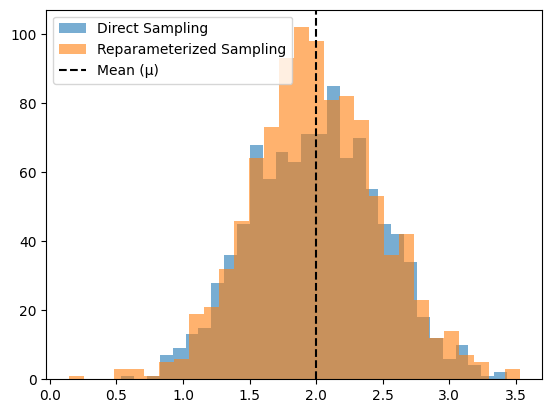

In [7]:
import torch
import matplotlib.pyplot as plt

# Parameters
mu = torch.tensor(2.0)
sigma = torch.tensor(0.5)

# Sample size
num_samples = 1000

# Direct sampling (without reparameterization)
direct_samples = torch.normal(mean=mu.expand(num_samples), std=sigma.expand(num_samples))

# Reparameterized sampling (with reparameterization trick)
epsilon = torch.randn(num_samples)  # Standard normal noise
reparam_samples = mu + sigma * epsilon  # Reparameterized samples

# Plotting the distributions
plt.hist(direct_samples.detach().numpy(), bins=30, alpha=0.6, label='Direct Sampling')
plt.hist(reparam_samples.detach().numpy(), bins=30, alpha=0.6, label='Reparameterized Sampling')
plt.axvline(mu.item(), color='black', linestyle='--', label="Mean (μ)")
plt.legend()
plt.show()
